Toy model pra Algoritmo Genético enfim kk

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

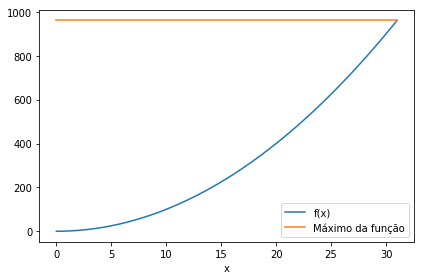

In [2]:
grid = np.linspace(0,31,500)

def funcao(x):
    return x**2

y=funcao(grid)

plt.xlabel('x')

plt.plot(grid,y, label='f(x)')
plt.plot([0,31],[funcao(31), funcao(31)], label='Máximo da função')
plt.legend()
plt.tight_layout()

plt.savefig('funcao_1')

In [3]:
numero_genes = 5
taxa_mutacao = 0.05
entrar_mut = 0.4

class individuo:
    
    def __init__(self, filho = False, pai = False):
        if not filho:
            DNA_ = list( np.random.randint(2, size = numero_genes-2) ) +[0,0]
            self.DNA=np.asarray(DNA_)
            self.fitness()
            
        else:
            aux=list(pai.DNA)
            self.mutacao(aux)
            self.fitness()        
        
    def mutacao(self, DNA_):
        if np.random.binomial(size = 1, n = 1, p = entrar_mut)[0] == 1:
            for i in range(numero_genes):
                if np.random.binomial(size = 1, n = 1, p = 1 - taxa_mutacao)[0] == 0:
                    DNA_[i] = 1 - DNA_[i]
        self.DNA = np.asarray(DNA_)
    
    
    def fitness(self):
        auxiliar = 0
        
        for i in range(numero_genes):
            auxiliar += self.DNA[i]*2**i
        
        self.valor = auxiliar
        self.fitness = funcao(self.valor)
        

In [4]:
class populacao:
    def __init__(self, tamanho_populacao):
        self.pop = []
        self.tamanho_populacao = tamanho_populacao
        
        for i in range(self.tamanho_populacao):
            self.pop.append(individuo())
        
        self.geracao1 = True
        self.fitness_list_pop()
        self.prob_calc()

    def prob_calc(self):
        probabilidade = np.asarray(self.fitness_list_pop())
        probabilidade = probabilidade/probabilidade.sum()
        # probabilidade = probabilidade/probabilidade.sum()
        
        self.probabilidade=probabilidade
    
    def reproducao(self):        
        populacao_nova = []
        lista_pais = []
        
        for i in range(self.tamanho_populacao):
            pai_number = np.random.choice(self.tamanho_populacao, p = self.probabilidade)
            lista_pais.append(self.pop[pai_number].DNA)
            populacao_nova.append(individuo(True, self.pop[pai_number])) 
        
        self.pop = populacao_nova
        self.lista_pais = lista_pais
        self.geracao1 = False
        self.fitness_list_pop()
        self.prob_calc()
        
    def fitness_list_pop(self):
        fitness_list=[]
        for i in range(self.tamanho_populacao):
            fitness_list.append(self.pop[i].fitness)
        self.fitness_list=fitness_list
        return fitness_list
    
    def fitness_max_pop(self):
        return np.asarray(self.fitness_list).max()
    
    def fitness_min_pop(self):
        return np.asarray(self.fitness_list).min()
    
    def fitness_mean_pop(self):
        return np.asarray(self.fitness_list).mean()
        
    def show(self):
        for i in range(self.tamanho_populacao):
            ind = self.pop[i]
            if self.geracao1:
                print('indivíduo: '+str(ind.DNA)+', valor: '+ str(ind.valor) +', fitness: f(x)='+str(ind.fitness)+', probabilidade: '+str(self.probabilidade[i]))
            else:
                pai = self.lista_pais[i]
                print('pai: '+str(pai)+', indivíduo: '+str(ind.DNA)+', valor: '+ str(ind.valor) +', fitness: f(x)='+str(ind.fitness)+', probabilidade: '+str(self.probabilidade[i]))
            
        #print('vetor de probabilidades: '+str(self.probabilidade))
        print('_____________________________________________________________________\n')
        

POPULAÇÃO INICIAL
indivíduo: [1 0 0 0 0], valor: 1, fitness: f(x)=1, probabilidade: 0.029411764705882353
indivíduo: [0 1 0 0 0], valor: 2, fitness: f(x)=4, probabilidade: 0.11764705882352941
indivíduo: [0 1 0 0 0], valor: 2, fitness: f(x)=4, probabilidade: 0.11764705882352941
indivíduo: [0 0 0 0 0], valor: 0, fitness: f(x)=0, probabilidade: 0.0
indivíduo: [1 0 1 0 0], valor: 5, fitness: f(x)=25, probabilidade: 0.7352941176470589
indivíduo: [0 0 0 0 0], valor: 0, fitness: f(x)=0, probabilidade: 0.0
_____________________________________________________________________

GERAÇÃO 2
pai: [1 0 1 0 0], indivíduo: [1 0 1 0 0], valor: 5, fitness: f(x)=25, probabilidade: 0.16666666666666666
pai: [1 0 1 0 0], indivíduo: [1 0 1 0 0], valor: 5, fitness: f(x)=25, probabilidade: 0.16666666666666666
pai: [1 0 1 0 0], indivíduo: [1 0 1 0 0], valor: 5, fitness: f(x)=25, probabilidade: 0.16666666666666666
pai: [1 0 1 0 0], indivíduo: [1 0 1 0 0], valor: 5, fitness: f(x)=25, probabilidade: 0.16666666666666

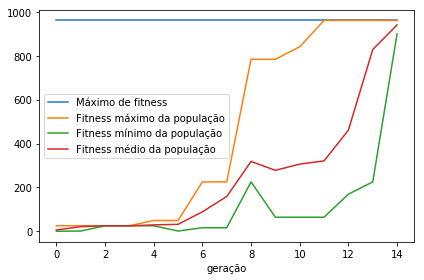

In [5]:
pop = populacao(6)

fitness_max_tempo=[]
fitness_max_tempo.append(pop.fitness_max_pop())

fitness_min_tempo=[]
fitness_min_tempo.append(pop.fitness_min_pop())

fitness_mean_tempo=[]
fitness_mean_tempo.append(pop.fitness_mean_pop())

print('POPULAÇÃO INICIAL')
pop.show()

numero_geracoes = 15

for j in range(numero_geracoes-1):
    pop.reproducao()
    fitness_max_tempo.append(pop.fitness_max_pop())
    fitness_min_tempo.append(pop.fitness_min_pop())
    fitness_mean_tempo.append(pop.fitness_mean_pop())
    
    if j==1 or j==2 or j==3 or j==np.floor(numero_geracoes/2):
        print('GERAÇÃO '+str(1+j))
        pop.show()

print('POPULAÇÃO FINAL')
pop.show()

plt.plot([0,numero_geracoes-1],[funcao(31), funcao(31)], label='Máximo de fitness')
plt.plot(list(range(numero_geracoes)),fitness_max_tempo, label='Fitness máximo da população')
plt.plot(list(range(numero_geracoes)),fitness_min_tempo, label='Fitness mínimo da população')
plt.plot(list(range(numero_geracoes)),fitness_mean_tempo, label='Fitness médio da população')
plt.xlabel('geração')

plt.legend()
plt.tight_layout()

plt.savefig('fitness_time1')